###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

In [1]:
#%pip install pandas

In [2]:
#!pip install seaborn

In [3]:
#!pip install wordcloud

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
import seaborn as sns

In [6]:
import numpy as np

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

Ονοματεπώνυμο φοιτητή: ΚΛΕΜΠΕΤΣΑΝΗΣ ΓΕΩΡΓΙΟΣ

Α.Μ.: 03120157

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [8]:
df = pd.read_csv('./train-val.csv')

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [9]:
train_test = pd.read_csv('./test.csv')

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [10]:
selected_column = [
    'id',
    'Date',
    'Location',
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustDir',
    'WindGustSpeed',
    'WindDir9am',
    'WindDir3pm',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm',
    'RainToday',
    'RainTomorrow',
]

### 2α
### Πλήθος των Δειγμάτων

In [11]:
num_samples = df.shape[0]
print(f"Number of samples : {num_samples}")

Number of samples : 48423


### Πλήθος Χαρακτηριστικών

In [12]:
num_columns = df.shape[1]
print(f"Number of characteristics: {num_columns}")

Number of characteristics: 24


### 2β
### Τα είδη των χαρακτηριστικών του συνόλου δεδομένων

In [13]:
column_data_types = df.dtypes

print("Data types of characteristics:")
print(column_data_types)

Data types of characteristics:
id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object


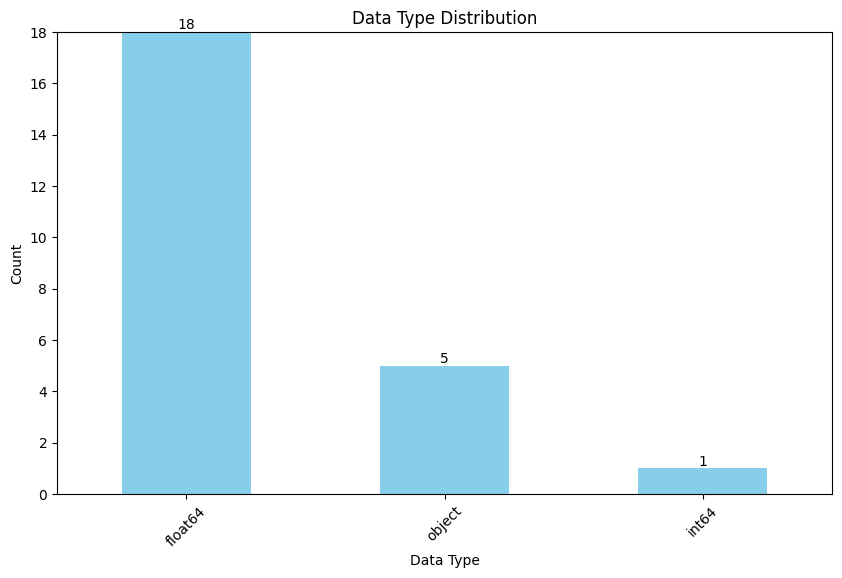

In [14]:
data_type_counts = column_data_types.value_counts()

custom_y_limits = (0, 18)
data_type_counts = column_data_types.value_counts()

# Create a bar chart to visualize data type distribution
plt.figure(figsize=(10, 6))
ax = data_type_counts.plot(kind='bar', color='skyblue')
plt.title('Data Type Distribution')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(custom_y_limits)
for i, v in enumerate(data_type_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

### 2γ
### Οι ετικέτες των χαρακτηριστικών

In [15]:
column_labels = df.columns

print("Labels of characteristics:")
print(column_labels)

Labels of characteristics:
Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


### 2δ
### Το πλήθος των κατηγοριών

In [16]:
categories_dict = {}

for column_name in selected_column:
  num_categories = df[column_name].nunique()
  categories_dict[column_name] = num_categories

for column_name, num_categories in categories_dict.items():
  print(f"Number of categories in '{column_name}': {num_categories}")

Number of categories in 'id': 48423
Number of categories in 'Date': 2534
Number of categories in 'Location': 49
Number of categories in 'MinTemp': 364
Number of categories in 'MaxTemp': 456
Number of categories in 'Rainfall': 443
Number of categories in 'Evaporation': 231
Number of categories in 'Sunshine': 140
Number of categories in 'WindGustDir': 16
Number of categories in 'WindGustSpeed': 61
Number of categories in 'WindDir9am': 16
Number of categories in 'WindDir3pm': 16
Number of categories in 'WindSpeed9am': 40
Number of categories in 'WindSpeed3pm': 42
Number of categories in 'Humidity9am': 101
Number of categories in 'Humidity3pm': 101
Number of categories in 'Pressure9am': 508
Number of categories in 'Pressure3pm': 497
Number of categories in 'Cloud9am': 10
Number of categories in 'Cloud3pm': 9
Number of categories in 'Temp9am': 396
Number of categories in 'Temp3pm': 452
Number of categories in 'RainToday': 2
Number of categories in 'RainTomorrow': 2


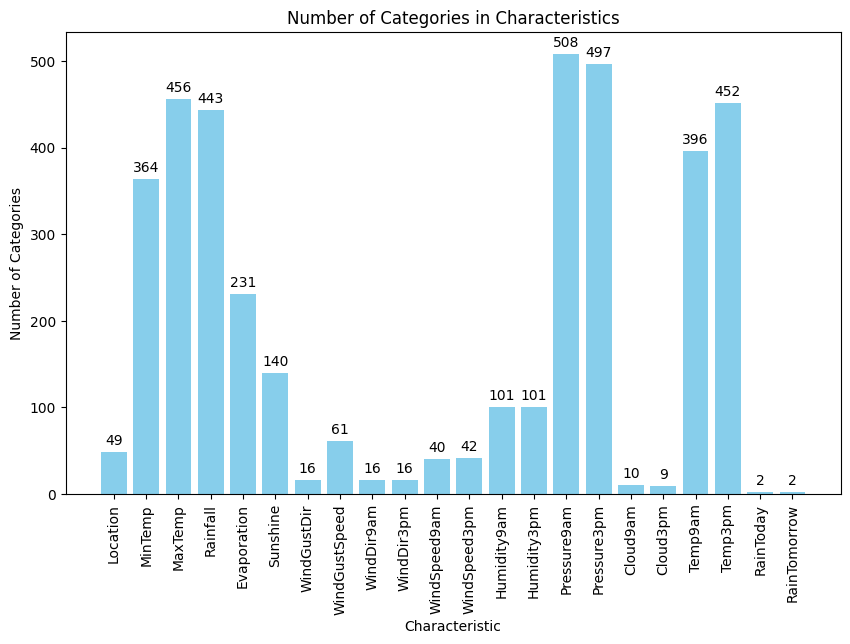

In [17]:
first_characteristic = list(categories_dict.keys())[0]
second_characteristic = list(categories_dict.keys())[1]
del categories_dict[first_characteristic]
del categories_dict[second_characteristic]


plt.figure(figsize=(10, 6))
ax = plt.bar(categories_dict.keys(), categories_dict.values(), color='skyblue')
plt.title('Number of Categories in Characteristics')
plt.xlabel('Characteristic')
plt.ylabel('Number of Categories')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
for bar, num_categories in zip(ax, categories_dict.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(num_categories), ha='center', va='bottom')
plt.show()

### 2ε
### Πλήθος δειγμάτων που ανήκουν σε κάθε κατηγορία

In [18]:
sample_counts_dict = {}

for column_name in selected_column:
  category_counts = df[column_name].value_counts().to_dict()
  sample_counts_dict[column_name] = category_counts

for column_name, category_counts in sample_counts_dict.items():
  print(f"Sample counts in '{column_name}':")
  for category, count in category_counts.items():
    print(f"{category}: {count}")

Sample counts in 'id':
1: 1
32287: 1
32278: 1
32279: 1
32280: 1
32281: 1
32282: 1
32283: 1
32284: 1
32285: 1
32286: 1
32288: 1
32276: 1
32289: 1
32290: 1
32291: 1
32292: 1
32293: 1
32294: 1
32295: 1
32296: 1
32297: 1
32277: 1
32275: 1
32252: 1
32263: 1
32254: 1
32255: 1
32256: 1
32257: 1
32258: 1
32259: 1
32260: 1
32261: 1
32262: 1
32264: 1
32274: 1
32265: 1
32266: 1
32267: 1
32268: 1
32269: 1
32270: 1
32271: 1
32272: 1
32273: 1
32298: 1
32299: 1
32300: 1
32334: 1
32325: 1
32326: 1
32327: 1
32328: 1
32329: 1
32330: 1
32331: 1
32332: 1
32333: 1
32335: 1
32301: 1
32336: 1
32337: 1
32338: 1
32339: 1
32340: 1
32341: 1
32342: 1
32343: 1
32344: 1
32324: 1
32323: 1
32322: 1
32321: 1
32302: 1
32303: 1
32304: 1
32305: 1
32306: 1
32307: 1
32308: 1
32309: 1
32310: 1
32311: 1
32312: 1
32313: 1
32314: 1
32315: 1
32316: 1
32317: 1
32318: 1
32319: 1
32320: 1
32253: 1
32251: 1
32535: 1
32192: 1
32183: 1
32184: 1
32185: 1
32186: 1
32187: 1
32188: 1
32189: 1
32190: 1
32191: 1
32193: 1
32181: 1
32194: 1


### 2στ
### Συσχέτιση μεταξύ των δεδομένων

In [19]:
numeric_df = df.select_dtypes(include=['float64'])#vazw mono tous arithmous
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.715692  0.096510     0.457483  0.053477   
MaxTemp        0.715692  1.000000 -0.103864     0.586798  0.469859   
Rainfall       0.096510 -0.103864  1.000000    -0.069284 -0.210261   
Evaporation    0.457483  0.586798 -0.069284     1.000000  0.351482   
Sunshine       0.053477  0.469859 -0.210261     0.351482  1.000000   
WindGustSpeed  0.163349  0.013580  0.160382     0.194751 -0.051283   
WindSpeed9am   0.193476  0.003229  0.102262     0.208774 -0.001514   
WindSpeed3pm   0.183079  0.054409  0.068231     0.154487  0.055941   
Humidity9am   -0.232420 -0.485241  0.217506    -0.521304 -0.471021   
Humidity3pm    0.021193 -0.504320  0.258283    -0.392778 -0.634892   
Pressure9am   -0.372295 -0.224734 -0.178761    -0.226294  0.078309   
Pressure3pm   -0.385832 -0.331614 -0.125762    -0.261228  0.010106   
Cloud9am       0.071455 -0.304386  0.202290    -0.188185 -0.693561   


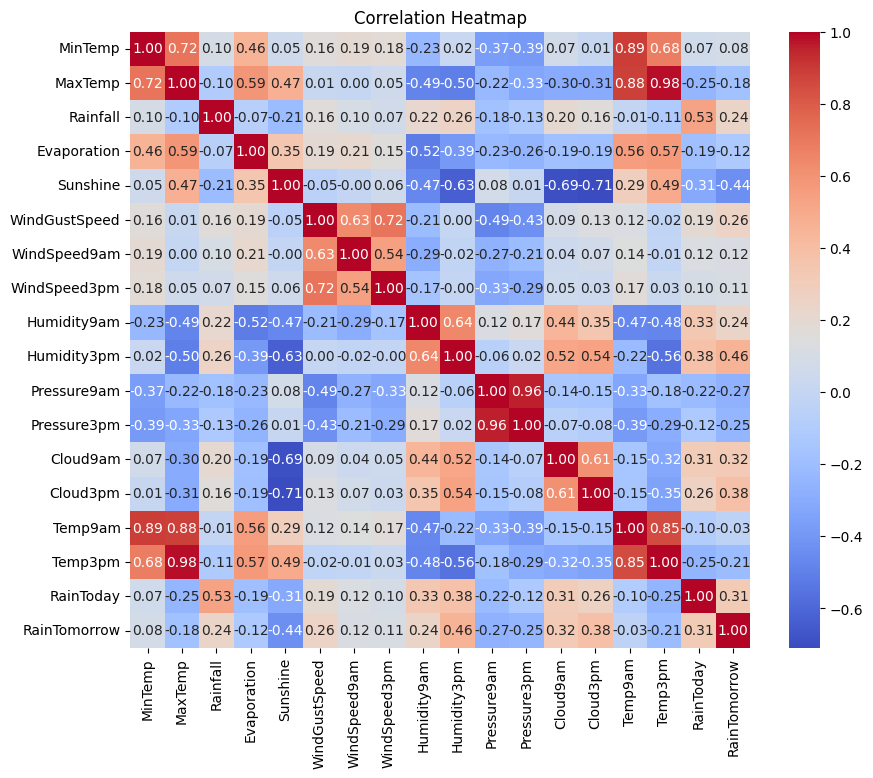

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

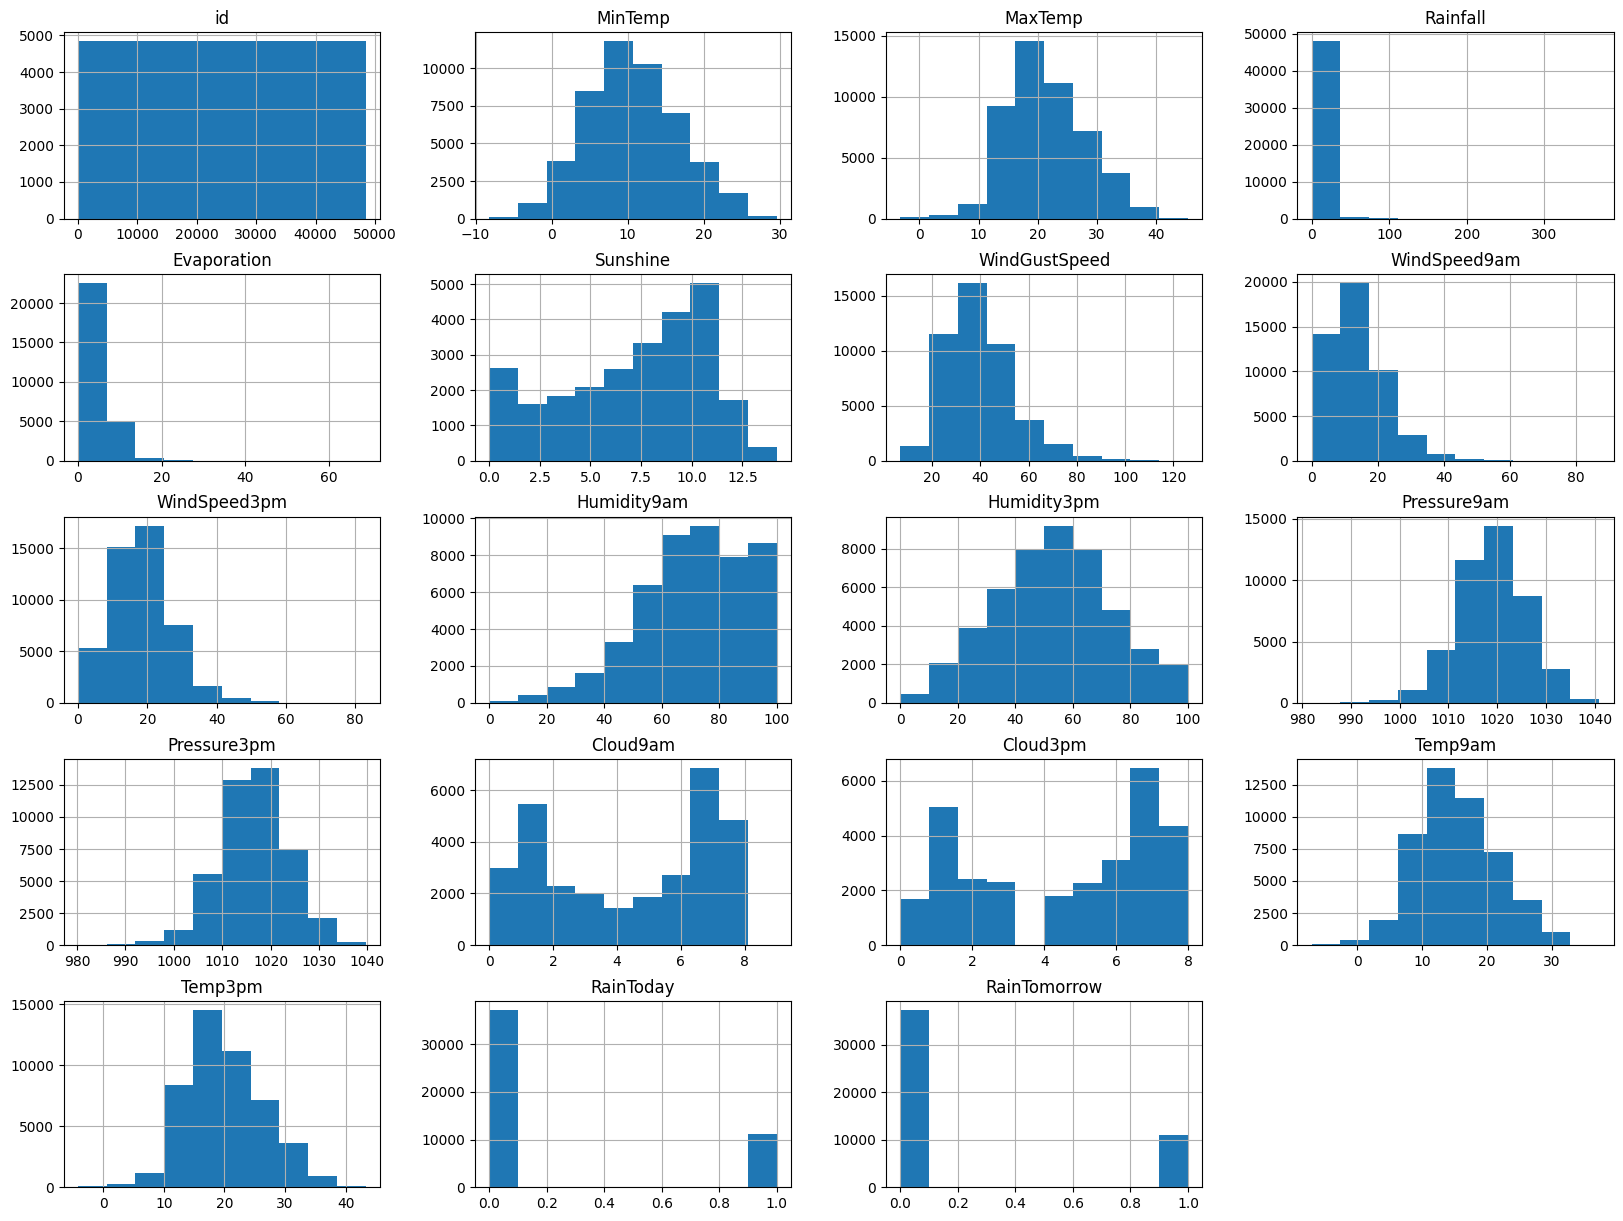

In [21]:
df.hist(bins=10, figsize=(20, 15))
plt.show()

### Έλεγχος αν τα δεδομένα είναι balanced ή unbalanced

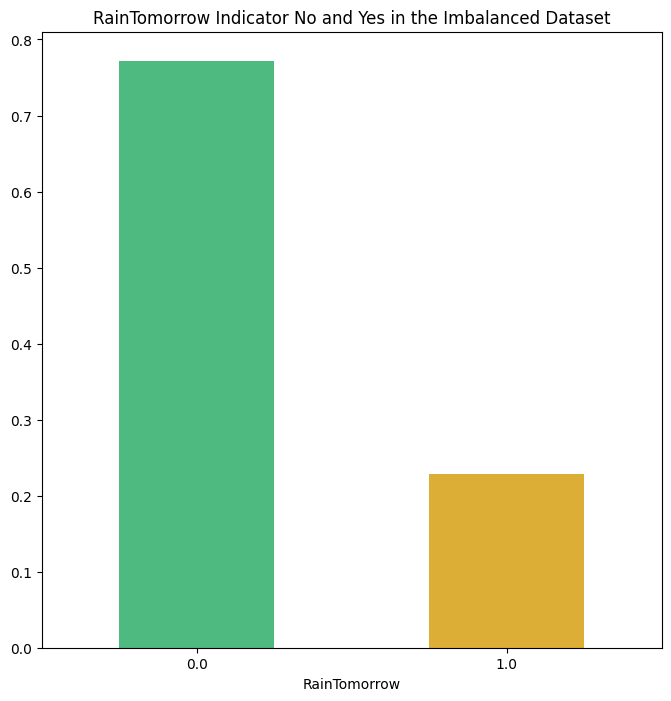

In [22]:
plt.figure(figsize=(8,8))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['MediumSeaGreen','Goldenrod'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes in the Imbalanced Dataset')
plt.show()

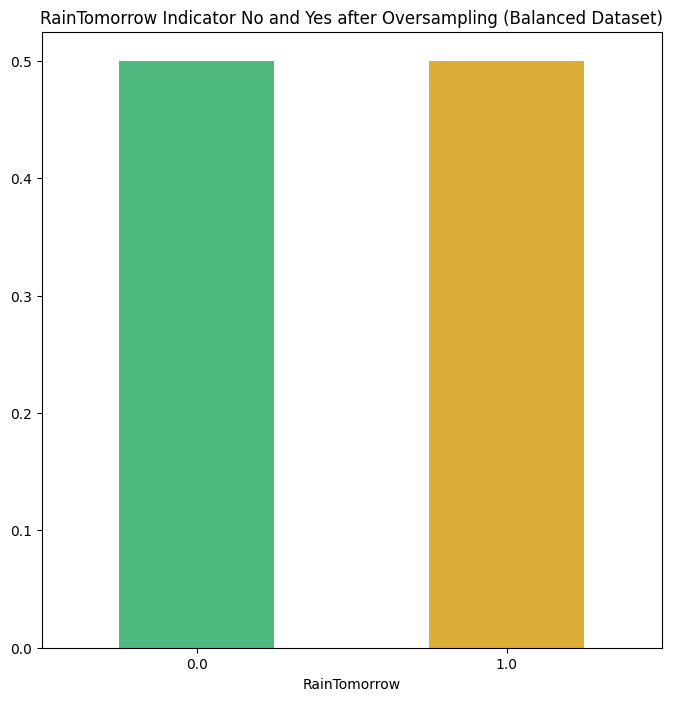

In [23]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,8))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['MediumSeaGreen','Goldenrod'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No and Yes after Oversampling (Balanced Dataset)')
plt.show()

In [24]:
oversampled.RainTomorrow.value_counts()

RainTomorrow
0.0    37364
1.0    37364
Name: count, dtype: int64

### Βροχή ανά περιοχή

In [25]:
rain_by_location = oversampled.groupby(by='Location').sum()
rain_by_location = rain_by_location[['RainToday']]
rain_by_location

,RainToday
Location,
Adelaide,550.0
Albany,719.0
Albury,511.0
AliceSprings,110.0
BadgerysCreek,361.0
Ballarat,724.0
Bendigo,355.0
Brisbane,442.0
Cairns,697.0


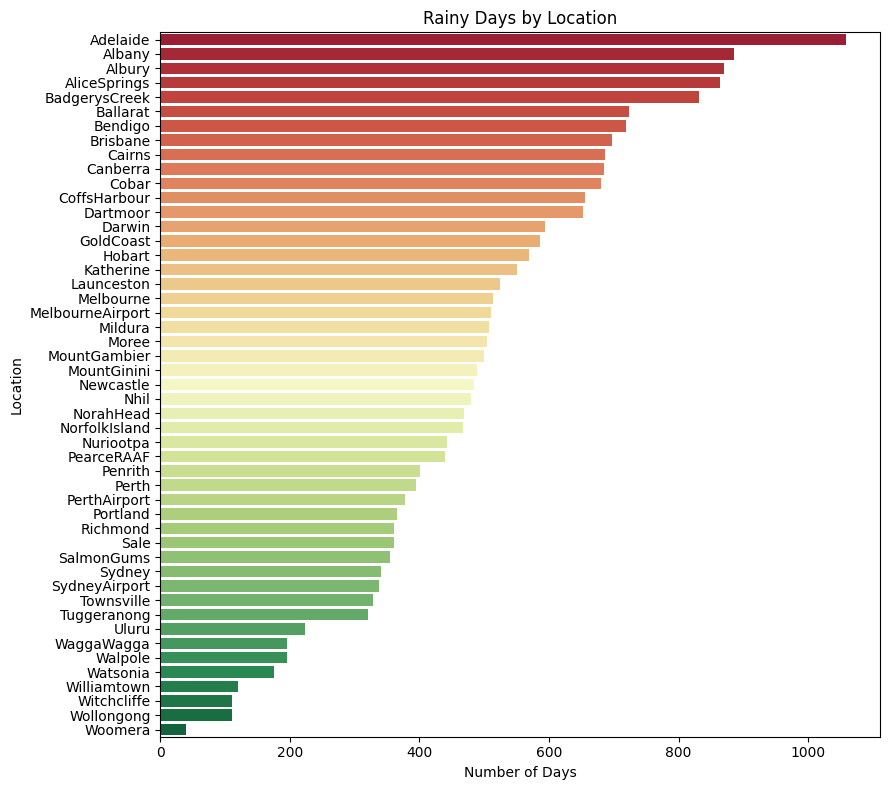

In [26]:
plt.figure(figsize=(9,8))
sns.barplot(x='RainToday', 
            y=rain_by_location.index, 
            data=rain_by_location.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='RdYlGn'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout();

### Συσχέτιση μέγιστης και ελάχιστης θερμοκρασίας με την βροχόπτωση σήμερα

### Διεύθυνση Ανέμου

In [27]:
print("Unique wind gust directions and their counts :")
windgustdir = oversampled["WindGustDir"].value_counts()
windgustdir = windgustdir.reset_index()
windgustdir.columns= ["Wind Gust Direction", "Counts"]
print(windgustdir)

Unique wind gust directions and their counts :
   Wind Gust Direction  Counts
0                    W    5923
1                    N    5703
2                   NW    5087
3                  WNW    5051
4                  WSW    4892
5                   SW    4748
6                    S    4397
7                  SSW    4273
8                  NNW    4165
9                   SE    3971
10                 SSE    3966
11                   E    3835
12                 NNE    3637
13                 ENE    3351
14                  NE    3316
15                 ESE    3268


### Διαχείριση outliers

In [28]:
IQR = oversampled.Rainfall.quantile(0.75) - oversampled.Rainfall.quantile(0.25)
Lower_fence = oversampled.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -7.199999999999999 or > 9.6


In [29]:
IQR = oversampled.Evaporation.quantile(0.75) - oversampled.Evaporation.quantile(0.25)
Lower_fence = oversampled.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -9.399999999999999 or > 17.2


In [30]:
IQR = oversampled.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -32.0 or > 58.0


In [31]:
IQR = oversampled.WindSpeed3pm.quantile(0.75) - oversampled.WindSpeed3pm.quantile(0.25)
Lower_fence = oversampled.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = oversampled.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [32]:
'''
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in oversampled:
    oversampled['Rainfall'] = max_value(oversampled, 'Rainfall', 3.2)
    oversampled['Evaporation'] = max_value(oversampled, 'Evaporation', 21.8)
    oversampled['WindSpeed9am'] = max_value(oversampled, 'WindSpeed9am', 55)
    oversampled['WindSpeed3pm'] = max_value(oversampled, 'WindSpeed3pm', 57)
'''

"\ndef max_value(df3, variable, top):\n    return np.where(df3[variable]>top, top, df3[variable])\n\nfor df3 in oversampled:\n    oversampled['Rainfall'] = max_value(oversampled, 'Rainfall', 3.2)\n    oversampled['Evaporation'] = max_value(oversampled, 'Evaporation', 21.8)\n    oversampled['WindSpeed9am'] = max_value(oversampled, 'WindSpeed9am', 55)\n    oversampled['WindSpeed3pm'] = max_value(oversampled, 'WindSpeed3pm', 57)\n"

In [33]:
oversampled

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,2009-03-04,Albury,13.8,22.1,0.2,NaN,NaN,WNW,57.0,...,57.0,26.0,1014.5,1013.1,NaN,NaN,15.6,21.9,0.0,0.0
1,2,2009-03-05,Albury,11.5,22.0,0.0,NaN,NaN,SW,50.0,...,60.0,33.0,1013.7,1011.8,NaN,NaN,13.9,21.4,0.0,0.0
2,3,2009-03-09,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,...,49.0,28.0,1019.7,1015.9,NaN,NaN,18.6,30.5,0.0,0.0
4,5,2009-03-11,Albury,18.4,30.5,1.2,NaN,NaN,NE,44.0,...,57.0,23.0,1021.3,1018.0,NaN,NaN,21.5,29.6,1.0,0.0
8,9,2009-03-17,Albury,8.4,25.3,0.0,NaN,NaN,WNW,35.0,...,78.0,34.0,1015.6,1013.2,NaN,NaN,12.1,23.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25120,25121,2011-09-23,Portland,8.6,12.7,0.2,4.6,5.3,WSW,67.0,...,60.0,52.0,1021.9,1023.6,7.0,6.0,9.8,12.4,0.0,1.0
17310,17311,2010-08-23,MountGinini,-2.5,4.0,0.0,NaN,NaN,NW,37.0,...,95.0,90.0,NaN,NaN,NaN,NaN,-1.3,1.0,0.0,1.0
14218,14219,2010-11-29,Wollongong,15.6,17.0,15.0,NaN,NaN,SSW,56.0,...,94.0,96.0,1014.8,1014.7,8.0,8.0,16.1,16.5,1.0,1.0
24328,24329,2013-09-06,Nhil,10.7,12.4,0.4,NaN,NaN,SW,17.0,...,91.0,82.0,1028.2,1025.8,NaN,NaN,11.1,11.6,0.0,1.0


In [34]:
# columns_to_process = [col for col in df.columns if col not in ['Date', 'Location', 'id', 'Rainfall', 'RainToday', 'RainTomorrow']]

# for column in columns_to_process:
#     if df[column].dtype == 'float64' or df[column].dtype == 'int64':
#         #Calculate the initial mean of the column
#         initial_mean = df[column].mean()

#         #Create a new column to store the updated mean value
#         df[column + '_UpdatedMean'] = initial_mean

#         #Initialize a flag to check if the current row is a NaN value
#         is_previous_nan = False

#         #Iterate through the rows in the column
#         for i in range(len(df)):
#             if pd.isna(df.at[i, column]):
#                 #Fill NaN values with the updated mean
#                 df.at[i, column] = df.at[i, column + '_UpdatedMean']

#                 #If the previous row was also a NaN value, update
#                 if is_previous_nan:
#                     mean_value = df[column].mean()
#                     df.at[i, column + '_UpdatedMean'] = mean_value

#                 #Set the flag for the current row
#                 is_previous_nan = True
#             else:
#                 #Update the mean value for the next NaN cell
#                 mean_value = df[column].mean()
#                 df.at[i, column + '_UpdatedMean'] = mean_value
#                 is_previous_nan = False

# df = df[df.columns[~df.columns.str.endswith('_UpdatedMean')]]

# df.info()

In [35]:
numeric_df = df.select_dtypes(include=['float64'])
corr = numeric_df.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.715692,0.096510,0.457483,0.053477,0.163349,0.193476,0.183079,-0.232420,0.021193,-0.372295,-0.385832,0.071455,0.006876,0.892621,0.682041,0.065077,0.084001
MaxTemp,0.715692,1.000000,-0.103864,0.586798,0.469859,0.013580,0.003229,0.054409,-0.485241,-0.504320,-0.224734,-0.331614,-0.304386,-0.305659,0.881130,0.984609,-0.247060,-0.177480
Rainfall,0.096510,-0.103864,1.000000,-0.069284,-0.210261,0.160382,0.102262,0.068231,0.217506,0.258283,-0.178761,-0.125762,0.202290,0.162473,-0.007844,-0.108617,0.527639,0.244867
Evaporation,0.457483,0.586798,-0.069284,1.000000,0.351482,0.194751,0.208774,0.154487,-0.521304,-0.392778,-0.226294,-0.261228,-0.188185,-0.193911,0.556079,0.569842,-0.191368,-0.122146
Sunshine,0.053477,0.469859,-0.210261,0.351482,1.000000,-0.051283,-0.001514,0.055941,-0.471021,-0.634892,0.078309,0.010106,-0.693561,-0.708928,0.286368,0.492766,-0.314345,-0.437883
WindGustSpeed,0.163349,0.013580,0.160382,0.194751,-0.051283,1.000000,0.633542,0.715518,-0.214060,0.004057,-0.485376,-0.434426,0.086327,0.125622,0.123985,-0.024427,0.188300,0.258618
WindSpeed9am,0.193476,0.003229,0.102262,0.208774,-0.001514,0.633542,1.000000,0.541097,-0.289202,-0.019900,-0.266217,-0.212422,0.035081,0.066148,0.141875,-0.008063,0.121898,0.118477
WindSpeed3pm,0.183079,0.054409,0.068231,0.154487,0.055941,0.715518,0.541097,1.000000,-0.166434,-0.003281,-0.327326,-0.289712,0.048956,0.032267,0.169477,0.030884,0.097368,0.109116
Humidity9am,-0.232420,-0.485241,0.217506,-0.521304,-0.471021,-0.214060,-0.289202,-0.166434,1.000000,0.644709,0.117477,0.167571,0.439629,0.349397,-0.472335,-0.478217,0.332583,0.244048
Humidity3pm,0.021193,-0.504320,0.258283,-0.392778,-0.634892,0.004057,-0.019900,-0.003281,0.644709,1.000000,-0.063572,0.019297,0.518187,0.536139,-0.218612,-0.556450,0.375488,0.458234


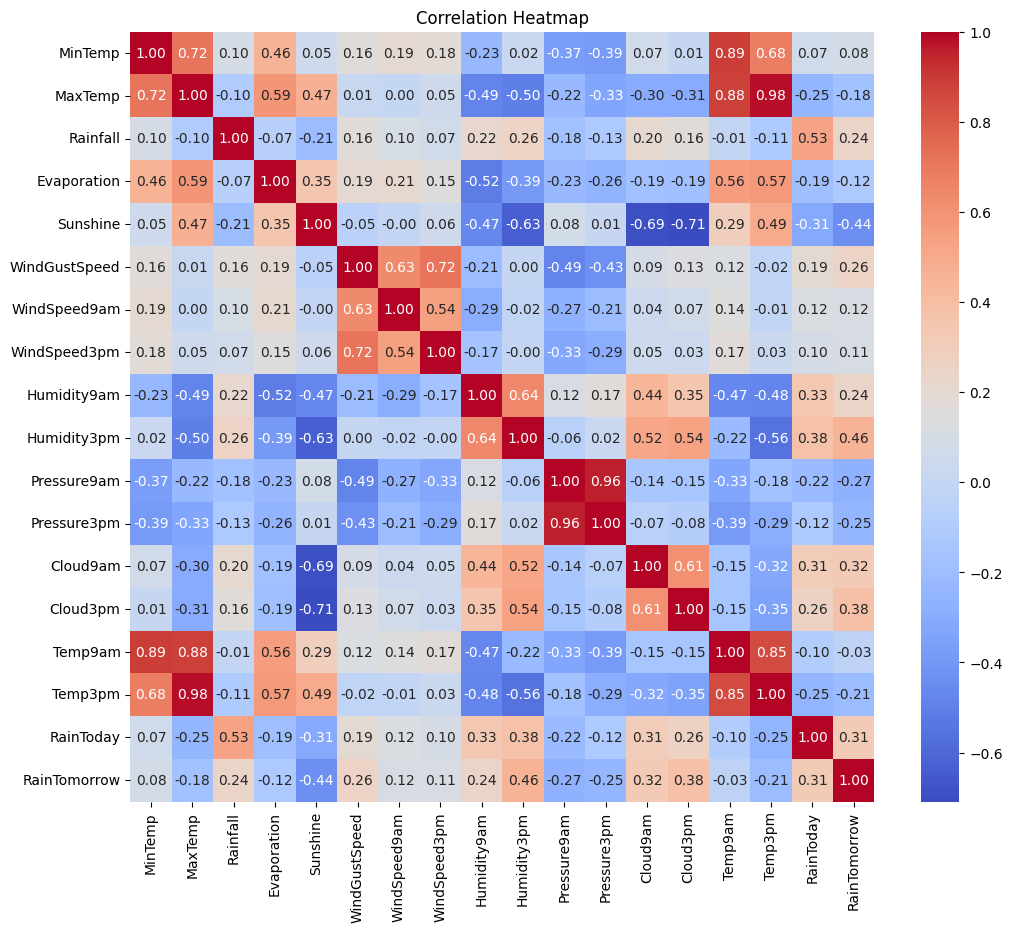

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Γεμίζω τα null values με **average** στα int και **most frequent** στα strings

In [37]:
numeric_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numeric_imputer = SimpleImputer(strategy='mean')

categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


In [38]:
df.isnull().sum()


id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [39]:
'''
df['WindSpeedMean'] = df[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)

df.drop(columns=['WindSpeed9am', 'WindSpeed3pm'], inplace=True)

df = df.drop('id', axis=1)

numeric_df = df.select_dtypes(include=['float64'])
corr_matrix = numeric_df.corr()
'''

"\ndf['WindSpeedMean'] = df[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)\n\ndf.drop(columns=['WindSpeed9am', 'WindSpeed3pm'], inplace=True)\n\ndf = df.drop('id', axis=1)\n\nnumeric_df = df.select_dtypes(include=['float64'])\ncorr_matrix = numeric_df.corr()\n"

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48423 non-null  float64
 4   MaxTemp        48423 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    48423 non-null  float64
 7   Sunshine       48423 non-null  float64
 8   WindGustDir    48423 non-null  object 
 9   WindGustSpeed  48423 non-null  float64
 10  WindDir9am     48423 non-null  object 
 11  WindDir3pm     48423 non-null  object 
 12  WindSpeed9am   48423 non-null  float64
 13  WindSpeed3pm   48423 non-null  float64
 14  Humidity9am    48423 non-null  float64
 15  Humidity3pm    48423 non-null  float64
 16  Pressure9am    48423 non-null  float64
 17  Pressure3pm    48423 non-null  float64
 18  Cloud9

In [41]:
'''
df['PressureMean'] = df[['Pressure9am', 'Pressure3pm']].mean(axis=1)

df.drop(columns=['Pressure9am', 'Pressure3pm'], inplace=True)

numeric_df = df.select_dtypes(include=['float64'])#vazw mono tous arithmous pali
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
'''

'\ndf[\'PressureMean\'] = df[[\'Pressure9am\', \'Pressure3pm\']].mean(axis=1)\n\ndf.drop(columns=[\'Pressure9am\', \'Pressure3pm\'], inplace=True)\n\nnumeric_df = df.select_dtypes(include=[\'float64\'])#vazw mono tous arithmous pali\ncorr_matrix = numeric_df.corr()\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(corr_matrix, cmap=\'coolwarm\', annot=True, fmt=".2f")\nplt.title(\'Correlation Heatmap\')\nplt.show()\n'

In [42]:
'''
df['HumidityMean'] = (df['Humidity9am']+df['Humidity3pm'])/2
df['HumidityWindSpeed'] = df['HumidityMean']*df['WindSpeedMean']

df.drop(columns=['Humidity9am', 'Humidity3pm'], inplace=True)

numeric_df = df.select_dtypes(include=['float64']) 
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
'''

'\ndf[\'HumidityMean\'] = (df[\'Humidity9am\']+df[\'Humidity3pm\'])/2\ndf[\'HumidityWindSpeed\'] = df[\'HumidityMean\']*df[\'WindSpeedMean\']\n\ndf.drop(columns=[\'Humidity9am\', \'Humidity3pm\'], inplace=True)\n\nnumeric_df = df.select_dtypes(include=[\'float64\']) \ncorr_matrix = numeric_df.corr()\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(corr_matrix, cmap=\'coolwarm\', annot=True, fmt=".2f")\nplt.title(\'Correlation Heatmap\')\nplt.show()\n'

In [43]:
'''
df['TempRange'] = df['Temp3pm']-df['Temp9am']
df.drop(columns=['Temp9am', 'Temp3pm'], inplace=True)

reordered_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm', 'HumidityWindSpeed', 'WindSpeedMean', 'PressureMean','HumidityMean', 'RainToday', 'RainTomorrow']
corr_matrix = corr_matrix.reindex(index=reordered_columns, columns=reordered_columns)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
'''

'\ndf[\'TempRange\'] = df[\'Temp3pm\']-df[\'Temp9am\']\ndf.drop(columns=[\'Temp9am\', \'Temp3pm\'], inplace=True)\n\nreordered_columns = [\'MinTemp\', \'MaxTemp\', \'Rainfall\', \'Evaporation\', \'Sunshine\', \'WindGustSpeed\', \'Cloud9am\', \'Cloud3pm\', \'HumidityWindSpeed\', \'WindSpeedMean\', \'PressureMean\',\'HumidityMean\', \'RainToday\', \'RainTomorrow\']\ncorr_matrix = corr_matrix.reindex(index=reordered_columns, columns=reordered_columns)\n\nplt.figure(figsize=(12, 10))\nsns.heatmap(corr_matrix, cmap=\'coolwarm\', annot=True, fmt=".2f")\nplt.title(\'Correlation Heatmap\')\nplt.show()\n'

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [44]:
df.duplicated().sum()

0

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

##### Στη συνέχεια θα κάνουμε oversampling έτσι, ώστε να αντιμετωπίσουμε το γεγονός ότι τα δεδομένα μας είναι unbalanced.

In [45]:
df

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,2009-03-04,Albury,13.8,22.1,0.2,4.590831,7.162259,WNW,57.0,...,57.0,26.0,1014.5,1013.1,4.407002,4.556076,15.6,21.9,0.0,0.0
1,2,2009-03-05,Albury,11.5,22.0,0.0,4.590831,7.162259,SW,50.0,...,60.0,33.0,1013.7,1011.8,4.407002,4.556076,13.9,21.4,0.0,0.0
2,3,2009-03-09,Albury,13.8,31.8,0.0,4.590831,7.162259,NNE,24.0,...,49.0,28.0,1019.7,1015.9,4.407002,4.556076,18.6,30.5,0.0,0.0
3,4,2009-03-10,Albury,15.5,32.0,0.0,4.590831,7.162259,NE,50.0,...,51.0,25.0,1019.5,1016.2,4.407002,4.556076,20.1,30.8,0.0,1.0
4,5,2009-03-11,Albury,18.4,30.5,1.2,4.590831,7.162259,NE,44.0,...,57.0,23.0,1021.3,1018.0,4.407002,4.556076,21.5,29.6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48418,48419,2017-06-12,Uluru,5.1,19.7,0.0,4.590831,7.162259,E,46.0,...,56.0,29.0,1028.5,1025.8,4.407002,4.556076,8.5,19.2,0.0,0.0
48419,48420,2017-06-16,Uluru,5.2,24.3,0.0,4.590831,7.162259,E,24.0,...,53.0,24.0,1023.8,1020.0,4.407002,4.556076,12.3,23.3,0.0,0.0
48420,48421,2017-06-20,Uluru,3.5,21.8,0.0,4.590831,7.162259,E,31.0,...,59.0,27.0,1024.7,1021.2,4.407002,4.556076,9.4,20.9,0.0,0.0
48421,48422,2017-06-23,Uluru,5.4,26.9,0.0,4.590831,7.162259,N,37.0,...,53.0,24.0,1021.0,1016.8,4.407002,4.556076,12.5,26.1,0.0,0.0


In [46]:
'''
oversampled.head()
oversampled.info()
oversampled.dropna(subset=['Evaporation', 'Sunshine','Cloud9am','Cloud3pm'],inplace = True)
oversampled.info()
oversampled['Humidity9am'] = oversampled['Humidity9am'].fillna(method= "ffill")
oversampled['Humidity3pm'] = oversampled['Humidity3pm'].fillna(method= "ffill")
oversampled['Pressure9am'] = oversampled['Pressure9am'].fillna(method= "ffill")
oversampled['Pressure3pm'] = oversampled['Pressure3pm'].fillna(method= "ffill")
oversampled['Temp3pm'] = oversampled['Temp3pm'].fillna(method= "bfill")
oversampled['WindSpeed3pm'] = oversampled['WindSpeed3pm'].fillna(method= "bfill")
oversampled['MaxTemp'] = oversampled['MaxTemp'].fillna(method= "bfill")
oversampled['MinTemp'] = oversampled['MinTemp'].fillna(method= "bfill")
oversampled['Temp9am'] = oversampled['Temp9am'].fillna(method= "bfill")
oversampled['Rainfall'] = oversampled['Rainfall'].fillna(method= "bfill") 
oversampled['WindSpeed9am'] = oversampled['WindSpeed9am'].fillna(method= "bfill")
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])
oversampled['RainToday'] = oversampled['RainToday'].fillna(oversampled['RainToday'].mode()[0])
oversampled['WindGustSpeed'] = oversampled['WindGustSpeed'].fillna(oversampled['WindGustSpeed'].mode()[0])
'''

'\noversampled.head()\noversampled.info()\noversampled.dropna(subset=[\'Evaporation\', \'Sunshine\',\'Cloud9am\',\'Cloud3pm\'],inplace = True)\noversampled.info()\noversampled[\'Humidity9am\'] = oversampled[\'Humidity9am\'].fillna(method= "ffill")\noversampled[\'Humidity3pm\'] = oversampled[\'Humidity3pm\'].fillna(method= "ffill")\noversampled[\'Pressure9am\'] = oversampled[\'Pressure9am\'].fillna(method= "ffill")\noversampled[\'Pressure3pm\'] = oversampled[\'Pressure3pm\'].fillna(method= "ffill")\noversampled[\'Temp3pm\'] = oversampled[\'Temp3pm\'].fillna(method= "bfill")\noversampled[\'WindSpeed3pm\'] = oversampled[\'WindSpeed3pm\'].fillna(method= "bfill")\noversampled[\'MaxTemp\'] = oversampled[\'MaxTemp\'].fillna(method= "bfill")\noversampled[\'MinTemp\'] = oversampled[\'MinTemp\'].fillna(method= "bfill")\noversampled[\'Temp9am\'] = oversampled[\'Temp9am\'].fillna(method= "bfill")\noversampled[\'Rainfall\'] = oversampled[\'Rainfall\'].fillna(method= "bfill") \noversampled[\'WindSpe

In [47]:
#oversampled.drop(['id'], axis = 1,inplace=True) 


In [48]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74728 entries, 0 to 11276
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74728 non-null  int64  
 1   Date           74728 non-null  object 
 2   Location       74728 non-null  object 
 3   MinTemp        74469 non-null  float64
 4   MaxTemp        74576 non-null  float64
 5   Rainfall       74728 non-null  float64
 6   Evaporation    42725 non-null  float64
 7   Sunshine       39206 non-null  float64
 8   WindGustDir    69583 non-null  object 
 9   WindGustSpeed  69629 non-null  float64
 10  WindDir9am     69238 non-null  object 
 11  WindDir3pm     72517 non-null  object 
 12  WindSpeed9am   74193 non-null  float64
 13  WindSpeed3pm   73320 non-null  float64
 14  Humidity9am    73804 non-null  float64
 15  Humidity3pm    72685 non-null  float64
 16  Pressure9am    67394 non-null  float64
 17  Pressure3pm    67362 non-null  float64
 18  Cloud9am   

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
df.isnull().sum()

id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48423 non-null  float64
 4   MaxTemp        48423 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    48423 non-null  float64
 7   Sunshine       48423 non-null  float64
 8   WindGustDir    48423 non-null  object 
 9   WindGustSpeed  48423 non-null  float64
 10  WindDir9am     48423 non-null  object 
 11  WindDir3pm     48423 non-null  object 
 12  WindSpeed9am   48423 non-null  float64
 13  WindSpeed3pm   48423 non-null  float64
 14  Humidity9am    48423 non-null  float64
 15  Humidity3pm    48423 non-null  float64
 16  Pressure9am    48423 non-null  float64
 17  Pressure3pm    48423 non-null  float64
 18  Cloud9

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48423 non-null  float64
 4   MaxTemp        48423 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    48423 non-null  float64
 7   Sunshine       48423 non-null  float64
 8   WindGustDir    48423 non-null  object 
 9   WindGustSpeed  48423 non-null  float64
 10  WindDir9am     48423 non-null  object 
 11  WindDir3pm     48423 non-null  object 
 12  WindSpeed9am   48423 non-null  float64
 13  WindSpeed3pm   48423 non-null  float64
 14  Humidity9am    48423 non-null  float64
 15  Humidity3pm    48423 non-null  float64
 16  Pressure9am    48423 non-null  float64
 17  Pressure3pm    48423 non-null  float64
 18  Cloud9

In [53]:
df['WindDirCombined'] = df['WindDir9am'].fillna('') + df['WindDir3pm'].fillna('')
df['WindDirCombined'] = df['WindDirCombined'].apply(lambda x: ''.join(sorted(set(x))))


df['WindSpeedMean'] = (df['WindSpeed9am'] + df['WindSpeed3pm']) / 2
df['AvgHumidity'] = (df['Humidity9am'] + df['Humidity3pm']) / 2
df['PressureMean'] = (df['Pressure9am'] + df['Pressure3pm']) / 2
df['AvgCloud'] = (df['Cloud9am'] + df['Cloud3pm']) / 2
df['TempRange'] = df['Temp3pm']-df['Temp9am']

df.drop(['id','WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'], axis = 1,inplace=True) 
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,WindDirCombined,WindSpeedMean,AvgHumidity,PressureMean,AvgCloud,TempRange,year,month,day
0,Albury,13.8,22.1,0.2,4.590831,7.162259,WNW,57.0,0.0,0.0,NW,29.5,41.5,1013.80,4.481539,6.3,2009,3,4
1,Albury,11.5,22.0,0.0,4.590831,7.162259,SW,50.0,0.0,0.0,SW,26.0,46.5,1012.75,4.481539,7.5,2009,3,5
2,Albury,13.8,31.8,0.0,4.590831,7.162259,NNE,24.0,0.0,0.0,ENS,11.5,38.5,1017.80,4.481539,11.9,2009,3,9
3,Albury,15.5,32.0,0.0,4.590831,7.162259,NE,50.0,0.0,1.0,ES,3.0,38.0,1017.85,4.481539,10.7,2009,3,10
4,Albury,18.4,30.5,1.2,4.590831,7.162259,NE,44.0,1.0,0.0,EN,17.0,40.0,1019.65,4.481539,8.1,2009,3,11


In [54]:
le=LabelEncoder
Location_le=LabelEncoder()
df['Location']=Location_le.fit_transform(df['Location'])
WindGustDir_le=LabelEncoder()
df['WindGustDir']=WindGustDir_le.fit_transform(df['WindGustDir'])
WindDir9am_le=LabelEncoder()
df['WindDirCombined']=WindDir9am_le.fit_transform(df['WindDirCombined']) 

In [55]:
train_test['WindDirCombined'] = train_test['WindDir9am'].fillna('') + train_test['WindDir3pm'].fillna('')
train_test['WindDirCombined'] = train_test['WindDirCombined'].apply(lambda x: ''.join(sorted(set(x))))


train_test['WindSpeedMean'] = (train_test['WindSpeed9am'] + train_test['WindSpeed3pm']) / 2
train_test['AvgHumidity'] = (train_test['Humidity9am'] + train_test['Humidity3pm']) / 2
train_test['PressureMean'] = (train_test['Pressure9am'] + train_test['Pressure3pm']) / 2
train_test['AvgCloud'] = (train_test['Cloud9am'] + train_test['Cloud3pm']) / 2
train_test['TempRange'] = train_test['Temp3pm']-train_test['Temp9am']

train_test.drop(['WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)
train_test['Date'] = pd.to_datetime(train_test['Date'])
train_test['year'] = train_test['Date'].dt.year
train_test['month'] = train_test['Date'].dt.month
train_test['day'] = train_test['Date'].dt.day
train_test.drop(['Date'], axis = 1,inplace=True) 
train_test.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_17936\1321709251.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_test['Date'] = pd.to_datetime(train_test['Date'])


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,WindDirCombined,WindSpeedMean,AvgHumidity,PressureMean,AvgCloud,TempRange,year,month,day
0,Albury,14.6,30.0,0.0,NaN,NaN,NE,37.0,0,EN,11.5,43.0,1013.75,2.0,10.9,2009,3,22
1,Albury,10.7,21.9,0.0,NaN,NaN,W,63.0,0,NW,28.5,35.5,1009.00,NaN,-1.6,2009,4,15
2,Albury,5.7,21.4,0.0,NaN,NaN,ESE,17.0,0,ENS,6.5,53.5,1023.05,NaN,8.7,2009,4,21
3,Albury,10.6,16.2,0.0,NaN,NaN,WNW,39.0,0,ENS,5.5,80.0,1005.65,8.0,0.2,2009,4,24
4,Albury,3.7,19.1,0.0,NaN,NaN,SSE,19.0,0,ES,5.5,69.0,1021.75,NaN,11.5,2009,5,19


In [56]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         9699 non-null   object 
 1   MinTemp          9664 non-null   float64
 2   MaxTemp          9683 non-null   float64
 3   Rainfall         9699 non-null   float64
 4   Evaporation      5560 non-null   float64
 5   Sunshine         5063 non-null   float64
 6   WindGustDir      9007 non-null   object 
 7   WindGustSpeed    9011 non-null   float64
 8   RainToday        9699 non-null   int64  
 9   WindDirCombined  9699 non-null   object 
 10  WindSpeedMean    9494 non-null   float64
 11  AvgHumidity      9421 non-null   float64
 12  PressureMean     8744 non-null   float64
 13  AvgCloud         5554 non-null   float64
 14  TempRange        9486 non-null   float64
 15  year             9699 non-null   int32  
 16  month            9699 non-null   int32  
 17  day           

In [57]:
X = df.drop('RainTomorrow', axis= 1).values 
y = df['RainTomorrow'].values
print(df)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0             2     13.8     22.1       0.2     4.590831  7.162259   
1             2     11.5     22.0       0.0     4.590831  7.162259   
2             2     13.8     31.8       0.0     4.590831  7.162259   
3             2     15.5     32.0       0.0     4.590831  7.162259   
4             2     18.4     30.5       1.2     4.590831  7.162259   
...         ...      ...      ...       ...          ...       ...   
48418        41      5.1     19.7       0.0     4.590831  7.162259   
48419        41      5.2     24.3       0.0     4.590831  7.162259   
48420        41      3.5     21.8       0.0     4.590831  7.162259   
48421        41      5.4     26.9       0.0     4.590831  7.162259   
48422        41      7.8     27.0       0.0     4.590831  7.162259   

       WindGustDir  WindGustSpeed  RainToday  RainTomorrow  WindDirCombined  \
0               14           57.0        0.0           0.0               11   
1

In [58]:
from sklearn.model_selection import train_test_split


##### Διαχωρίζουμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) σε ποσοστό 70-30.

In [59]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [60]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


# Naive-Bayes Classifier

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Με default τιμες

In [62]:
from sklearn.naive_bayes import GaussianNB
classifier_nbc = GaussianNB()
classifier_nbc.fit(X_train, y_train)
y_pred_nbc = classifier_nbc.predict(X_test)
print(classification_report(y_test, y_pred_nbc))
f1_nbc = f1_score(y_test,y_pred_nbc, average = 'weighted',labels=np.unique(y_pred_nbc))
print('Naive Bayes f1_score : ', f1_nbc)

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     11184
         1.0       0.56      0.60      0.58      3343

    accuracy                           0.80     14527
   macro avg       0.72      0.73      0.72     14527
weighted avg       0.80      0.80      0.80     14527

Naive Bayes f1_score :  0.8013031765393046


### Με hyperparametring τιμές

In [63]:
nbc = GaussianNB()

# Hyperparameter Optimization
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

# Hyperparameter Optimization
parameters = {
    'var_smoothing': [0.01]
}
# Run the grid search
grid_obj = GridSearchCV(nbc, parameters, cv=5, scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
nbc = grid_obj.best_estimator_

# Train the model using the training sets 
nbc.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START var_smoothing=0.01..........................................
[CV 1/5; 1/1] END ...........var_smoothing=0.01;, score=0.563 total time=   0.0s
[CV 2/5; 1/1] START var_smoothing=0.01..........................................
[CV 2/5; 1/1] END ...........var_smoothing=0.01;, score=0.550 total time=   0.0s
[CV 3/5; 1/1] START var_smoothing=0.01..........................................
[CV 3/5; 1/1] END ...........var_smoothing=0.01;, score=0.582 total time=   0.0s
[CV 4/5; 1/1] START var_smoothing=0.01..........................................
[CV 4/5; 1/1] END ...........var_smoothing=0.01;, score=0.551 total time=   0.0s
[CV 5/5; 1/1] START var_smoothing=0.01..........................................
[CV 5/5; 1/1] END ...........var_smoothing=0.01;, score=0.570 total time=   0.0s


GaussianNB(var_smoothing=0.01)

In [64]:
y_pred = nbc.predict(X_test)
f1_nbc_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of NBC model : ', f1_nbc_hyp)

F1 Score of NBC model :  0.809035289774419


# ΚΝΝ Classifier

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [66]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Με default τιμές

In [67]:
from sklearn.neighbors import KNeighborsClassifier

classifier_kNN = KNeighborsClassifier(n_neighbors=5)
classifier_kNN.fit(X_train, y_train)
y_pred_kNN = classifier_kNN.predict(X_test)
# compute the classification report
print(classification_report(y_test, y_pred_kNN))
f1_kNN = f1_score(y_test,y_pred_kNN, average = 'weighted',labels=np.unique(y_pred_kNN))
print('KNN f1_score : ', f1_kNN)

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89     11184
         1.0       0.66      0.45      0.54      3343

    accuracy                           0.82     14527
   macro avg       0.76      0.69      0.71     14527
weighted avg       0.81      0.82      0.81     14527

KNN f1_score :  0.8079863460925857


### Hyperparameter Tuning

In [68]:
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [1, 5, 8, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Hyperparameter Optimization
parameters = {'n_neighbors': [1],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = RandomizedSearchCV(knn, parameters, cv=5 , n_iter = 15, scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START leaf_size=10, n_neighbors=1.................................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=15. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/5; 1/4] END ..leaf_size=10, n_neighbors=1;, score=0.516 total time=   0.3s
[CV 2/5; 1/4] START leaf_size=10, n_neighbors=1.................................
[CV 2/5; 1/4] END ..leaf_size=10, n_neighbors=1;, score=0.503 total time=   0.3s
[CV 3/5; 1/4] START leaf_size=10, n_neighbors=1.................................


[CV 3/5; 1/4] END ..leaf_size=10, n_neighbors=1;, score=0.515 total time=   0.3s
[CV 4/5; 1/4] START leaf_size=10, n_neighbors=1.................................
[CV 4/5; 1/4] END ..leaf_size=10, n_neighbors=1;, score=0.527 total time=   0.2s
[CV 5/5; 1/4] START leaf_size=10, n_neighbors=1.................................
[CV 5/5; 1/4] END ..leaf_size=10, n_neighbors=1;, score=0.510 total time=   0.2s
[CV 1/5; 2/4] START leaf_size=20, n_neighbors=1.................................
[CV 1/5; 2/4] END ..leaf_size=20, n_neighbors=1;, score=0.516 total time=   0.2s
[CV 2/5; 2/4] START leaf_size=20, n_neighbors=1.................................
[CV 2/5; 2/4] END ..leaf_size=20, n_neighbors=1;, score=0.503 total time=   0.2s
[CV 3/5; 2/4] START leaf_size=20, n_neighbors=1.................................
[CV 3/5; 2/4] END ..leaf_size=20, n_neighbors=1;, score=0.515 total time=   0.2s
[CV 4/5; 2/4] START leaf_size=20, n_neighbors=1.................................
[CV 4/5; 2/4] END ..leaf_siz

KNeighborsClassifier(leaf_size=10, n_neighbors=1)

In [69]:
y_pred = knn.predict(X_test)
f1_kNN_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of kNN model : ', f1_kNN_hyp)

F1 Score of kNN model :  0.7869277070126879


# Logistic Regression

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### default

In [71]:
from sklearn.linear_model import LogisticRegression
classifier_reg = LogisticRegression()
classifier_reg.fit(X_train, y_train)
y_pred_reg = classifier_reg.predict(X_test)
print(classification_report(y_test, y_pred_reg))
f1_reg = f1_score(y_test,y_pred_reg, average = 'weighted',labels=np.unique(y_pred_reg))
print('Logistic Regression f1_score : ', f1_reg)

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11184
         1.0       0.72      0.49      0.58      3343

    accuracy                           0.84     14527
   macro avg       0.79      0.72      0.74     14527
weighted avg       0.83      0.84      0.83     14527

Logistic Regression f1_score :  0.826030054827096


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hyperparameter

In [72]:
reg = LogisticRegression()

parameters = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
parameters = [    
    {'penalty' : ['none'],
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [1000]
    }
]
#LogisticRegression(C=0.08858667904100823, max_iter=1000, penalty='none')


grid_obj =RandomizedSearchCV(reg, parameters, cv=3,n_iter=15 ,scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
reg = grid_obj.best_estimator_

# Train the model using the training sets 
reg.fit(X_train,y_train)

C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3; 1/15] START C=0.004832930238571752, max_iter=1000, penalty=none........
[CV 1/3; 1/15] END C=0.004832930238571752, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 1/15] START C=0.004832930238571752, max_iter=1000, penalty=none........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 1/15] END C=0.004832930238571752, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 1/15] START C=0.004832930238571752, max_iter=1000, penalty=none........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 1/15] END C=0.004832930238571752, max_iter=1000, penalty=none;, score=0.580 total time=   0.7s
[CV 1/3; 2/15] START C=0.0018329807108324356, max_iter=1000, penalty=none.......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 2/15] END C=0.0018329807108324356, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 2/15] START C=0.0018329807108324356, max_iter=1000, penalty=none.......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 2/15] END C=0.0018329807108324356, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 2/15] START C=0.0018329807108324356, max_iter=1000, penalty=none.......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 2/15] END C=0.0018329807108324356, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 3/15] START C=1.623776739188721, max_iter=1000, penalty=none...........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 3/15] END C=1.623776739188721, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 3/15] START C=1.623776739188721, max_iter=1000, penalty=none...........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 3/15] END C=1.623776739188721, max_iter=1000, penalty=none;, score=0.574 total time=   0.9s
[CV 3/3; 3/15] START C=1.623776739188721, max_iter=1000, penalty=none...........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 3/15] END C=1.623776739188721, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 4/15] START C=0.08858667904100823, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 4/15] END C=0.08858667904100823, max_iter=1000, penalty=none;, score=0.558 total time=   0.8s
[CV 2/3; 4/15] START C=0.08858667904100823, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 4/15] END C=0.08858667904100823, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 4/15] START C=0.08858667904100823, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 4/15] END C=0.08858667904100823, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 5/15] START C=1438.44988828766, max_iter=1000, penalty=none............


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 5/15] END C=1438.44988828766, max_iter=1000, penalty=none;, score=0.558 total time=   1.0s
[CV 2/3; 5/15] START C=1438.44988828766, max_iter=1000, penalty=none............


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 5/15] END C=1438.44988828766, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 5/15] START C=1438.44988828766, max_iter=1000, penalty=none............


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 5/15] END C=1438.44988828766, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 6/15] START C=11.288378916846883, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 6/15] END C=11.288378916846883, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 6/15] START C=11.288378916846883, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 6/15] END C=11.288378916846883, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 6/15] START C=11.288378916846883, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 6/15] END C=11.288378916846883, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 7/15] START C=0.23357214690901212, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 7/15] END C=0.23357214690901212, max_iter=1000, penalty=none;, score=0.558 total time=   0.8s
[CV 2/3; 7/15] START C=0.23357214690901212, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 7/15] END C=0.23357214690901212, max_iter=1000, penalty=none;, score=0.574 total time=   0.9s
[CV 3/3; 7/15] START C=0.23357214690901212, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 7/15] END C=0.23357214690901212, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 8/15] START C=0.615848211066026, max_iter=1000, penalty=none...........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 8/15] END C=0.615848211066026, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 8/15] START C=0.615848211066026, max_iter=1000, penalty=none...........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 8/15] END C=0.615848211066026, max_iter=1000, penalty=none;, score=0.574 total time=   0.9s
[CV 3/3; 8/15] START C=0.615848211066026, max_iter=1000, penalty=none...........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 8/15] END C=0.615848211066026, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 9/15] START C=0.03359818286283781, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 9/15] END C=0.03359818286283781, max_iter=1000, penalty=none;, score=0.558 total time=   0.8s
[CV 2/3; 9/15] START C=0.03359818286283781, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 9/15] END C=0.03359818286283781, max_iter=1000, penalty=none;, score=0.574 total time=   0.9s
[CV 3/3; 9/15] START C=0.03359818286283781, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 9/15] END C=0.03359818286283781, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 10/15] START C=0.0006951927961775605, max_iter=1000, penalty=none......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 10/15] END C=0.0006951927961775605, max_iter=1000, penalty=none;, score=0.558 total time=   0.8s
[CV 2/3; 10/15] START C=0.0006951927961775605, max_iter=1000, penalty=none......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 10/15] END C=0.0006951927961775605, max_iter=1000, penalty=none;, score=0.574 total time=   0.9s
[CV 3/3; 10/15] START C=0.0006951927961775605, max_iter=1000, penalty=none......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 10/15] END C=0.0006951927961775605, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 11/15] START C=29.763514416313132, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 11/15] END C=29.763514416313132, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 11/15] START C=29.763514416313132, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 11/15] END C=29.763514416313132, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 11/15] START C=29.763514416313132, max_iter=1000, penalty=none.........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 11/15] END C=29.763514416313132, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 12/15] START C=78.47599703514607, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 12/15] END C=78.47599703514607, max_iter=1000, penalty=none;, score=0.558 total time=   1.0s
[CV 2/3; 12/15] START C=78.47599703514607, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 12/15] END C=78.47599703514607, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 12/15] START C=78.47599703514607, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 12/15] END C=78.47599703514607, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 13/15] START C=0.012742749857031334, max_iter=1000, penalty=none.......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 13/15] END C=0.012742749857031334, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 13/15] START C=0.012742749857031334, max_iter=1000, penalty=none.......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 13/15] END C=0.012742749857031334, max_iter=1000, penalty=none;, score=0.574 total time=   0.9s
[CV 3/3; 13/15] START C=0.012742749857031334, max_iter=1000, penalty=none.......


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 13/15] END C=0.012742749857031334, max_iter=1000, penalty=none;, score=0.580 total time=   0.7s
[CV 1/3; 14/15] START C=3792.690190732246, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 14/15] END C=3792.690190732246, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 14/15] START C=3792.690190732246, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 14/15] END C=3792.690190732246, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 14/15] START C=3792.690190732246, max_iter=1000, penalty=none..........


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 14/15] END C=3792.690190732246, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s
[CV 1/3; 15/15] START C=0.0001, max_iter=1000, penalty=none.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 15/15] END C=0.0001, max_iter=1000, penalty=none;, score=0.558 total time=   0.9s
[CV 2/3; 15/15] START C=0.0001, max_iter=1000, penalty=none.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 15/15] END C=0.0001, max_iter=1000, penalty=none;, score=0.574 total time=   1.0s
[CV 3/3; 15/15] START C=0.0001, max_iter=1000, penalty=none.....................


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 15/15] END C=0.0001, max_iter=1000, penalty=none;, score=0.580 total time=   0.6s


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

LogisticRegression(C=0.004832930238571752, max_iter=1000, penalty='none')

In [73]:
y_pred = reg.predict(X_test)
f1_reg_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of Logistic Regression: ', f1_reg_hyp)

F1 Score of Logistic Regression:  0.827597730829086


# MLP για ένα κρυφό επίπεδο

In [74]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### default

In [75]:
from sklearn.neural_network import MLPClassifier
classifier_mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5),activation = 'tanh', random_state=1)
classifier_mlp.fit(X_train, y_train)
y_pred_mlp = classifier_mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
f1_mlp = f1_score(y_test,y_pred_mlp, average = 'weighted',labels=np.unique(y_pred_mlp))
print('MLP f1_score : ', f1_mlp)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     11184
         1.0       0.72      0.53      0.61      3343

    accuracy                           0.84     14527
   macro avg       0.79      0.73      0.76     14527
weighted avg       0.83      0.84      0.83     14527

MLP f1_score :  0.8346977491955346


### Hyperparameter

In [76]:
mlp = MLPClassifier()

parameters = {
    'hidden_layer_sizes': [(300)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.05],
    'learning_rate': ['adaptive'],
}

parameters = {
    'hidden_layer_sizes': [(300)],  
    'alpha': [0.05],
    'learning_rate': ['adaptive'],
}

grid_obj =GridSearchCV(mlp, parameters, cv=5,n_jobs=-1, scoring='f1', verbose=True)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
mlp = grid_obj.best_estimator_

# Train the model using the training sets 
mlp.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


MLPClassifier(alpha=0.05, hidden_layer_sizes=300, learning_rate='adaptive')

In [77]:
y_pred = mlp.predict(X_test)
f1_mlp_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of MLP: ', f1_mlp_hyp)

F1 Score of MLP:  0.8404183290646663


# SVC

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### default

In [80]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
y_pred_svc = classifier_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))
f1_svc = f1_score(y_test,y_pred_svc, average = 'weighted',labels=np.unique(y_pred_svc))
print('SVC f1_score : ', f1_svc)

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     11184
         1.0       0.78      0.47      0.59      3343

    accuracy                           0.85     14527
   macro avg       0.82      0.72      0.75     14527
weighted avg       0.84      0.85      0.83     14527

SVC f1_score :  0.8333066070265204


# Decision Tree

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [82]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### default

In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
f1_dt = f1_score(y_test,y_pred_dt, average = 'weighted',labels=np.unique(y_pred_dt))
print('Decision Tree f1_score : ', f1_dt)

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     11184
         1.0       0.50      0.51      0.50      3343

    accuracy                           0.77     14527
   macro avg       0.68      0.68      0.68     14527
weighted avg       0.77      0.77      0.77     14527

Decision Tree f1_score :  0.7702293895027379


### hyperparameter

In [84]:
dt = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Hyperparameter Optimization
parameters = {'max_features': ['sqrt'], 
              'max_depth': [50], 
              'min_samples_split': [3]
             }

# Run the grid search
grid_obj = RandomizedSearchCV(dt, parameters, cv=5,n_iter = 50 ,scoring='f1', verbose=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
dt = grid_obj.best_estimator_

# Train the model using the training sets 
dt.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_split=3;, score=0.475 total time=   0.0s


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_split=3;, score=0.481 total time=   0.0s
[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_split=3;, score=0.511 total time=   0.0s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_split=3;, score=0.505 total time=   0.0s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_split=3;, score=0.499 total time=   0.0s


DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_split=3)

In [85]:
y_pred = dt.predict(X_test)
f1_dt_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of Decision Tree: ', f1_dt_hyp)

F1 Score of Decision Tree:  0.7798321890651563


# Randon Forest

In [86]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### default

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
y_pred_rf= classifier_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
f1_rf = f1_score(y_test,y_pred_rf, average = 'weighted',labels=np.unique(y_pred_rf))
print('Random Forest f1_score : ', f1_rf)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11184
         1.0       0.76      0.52      0.62      3343

    accuracy                           0.85     14527
   macro avg       0.81      0.74      0.76     14527
weighted avg       0.84      0.85      0.84     14527

Random Forest f1_score :  0.8410745096025399


### hyperparameter

In [88]:
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }
# Hyperparameter Optimization
parameters = {'n_estimators': [9], 
              'max_features': ['log2'],  
              'max_depth': [10],  
              'min_samples_leaf': [8]
             }
# Run the grid search
grid_obj = RandomizedSearchCV(rf, parameters, cv=5,n_iter = 8 ,scoring='f1', verbose=10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9


C:\Users\chris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=8. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/5; 1/1] END max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9;, score=0.559 total time=   0.3s
[CV 2/5; 1/1] START max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9
[CV 2/5; 1/1] END max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9;, score=0.562 total time=   0.3s
[CV 3/5; 1/1] START max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9
[CV 3/5; 1/1] END max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9;, score=0.572 total time=   0.3s
[CV 4/5; 1/1] START max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9
[CV 4/5; 1/1] END max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9;, score=0.555 total time=   0.3s
[CV 5/5; 1/1] START max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9
[CV 5/5; 1/1] END max_depth=10, max_features=log2, min_samples_leaf=8, n_estimators=9;, score=0.571 total time=   0.2s


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=8,
                       n_estimators=9)

In [89]:
y_pred = rf.predict(X_test)
f1_rf_hyp = f1_score(y_test,y_pred, average = 'weighted',labels=np.unique(y_pred))
print('F1 Score of Decision Tree: ', f1_rf_hyp)

F1 Score of Decision Tree:  0.8305274394305623


# Σύγκριση Μοντέλων

In [90]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'kNN', 'Logistic Regression', 'MLP', 'SVC', 'Decision Tree', 'Random Forest'],
    'F1_Score': [f1_nbc, f1_kNN, f1_reg, f1_mlp, f1_svc, f1_dt, f1_rf]})
models.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
6,Random Forest,0.841075
3,MLP,0.834698
4,SVC,0.833307
2,Logistic Regression,0.826030
1,kNN,0.807986
0,Naive Bayes,0.801303
5,Decision Tree,0.770229


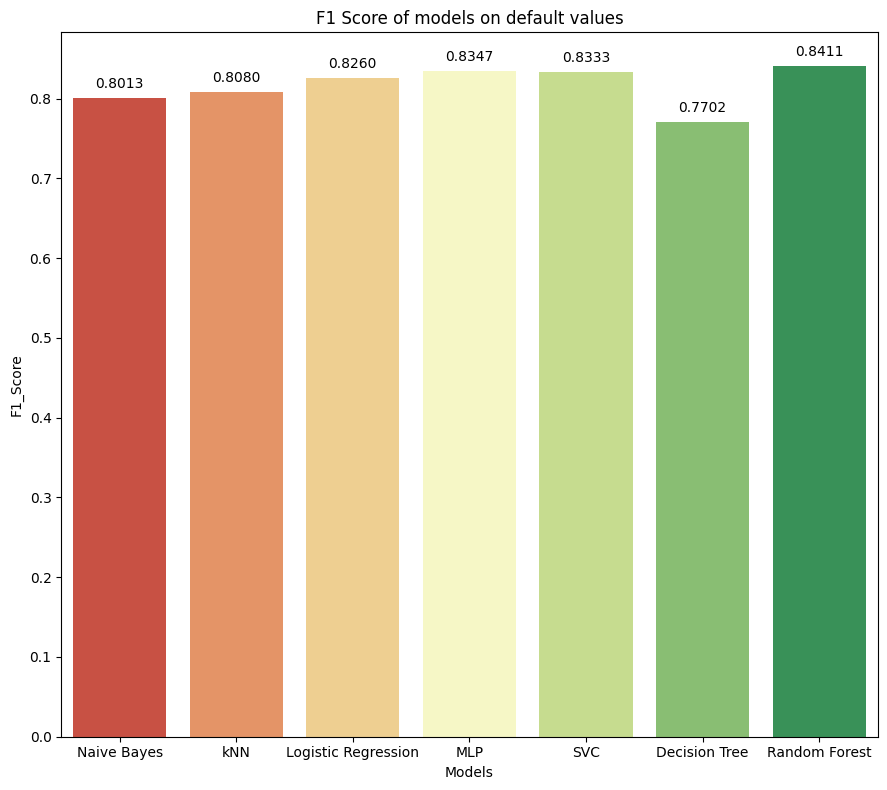

In [91]:
plt.figure(figsize=(9,8))
ax=sns.barplot(x=models.Model, 
            y=models.F1_Score, 
            orient='v',
            palette='RdYlGn'
           )
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points'
               )
plt.xlabel('Models')
plt.title('F1 Score of models on default values')
plt.tight_layout();

In [92]:
models_hyp = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Logistic Regression', 'MLP',  'Decision Tree', 'Random Forest'],
    'F1_Score': [f1_nbc_hyp, f1_kNN_hyp, f1_reg_hyp, f1_mlp_hyp, f1_dt_hyp, f1_rf_hyp]})
models_hyp.sort_values(by='F1_Score', ascending=False)

,Model,F1_Score
3,MLP,0.840418
5,Random Forest,0.830527
2,Logistic Regression,0.827598
0,Naive Bayes,0.809035
1,KNN,0.786928
4,Decision Tree,0.779832


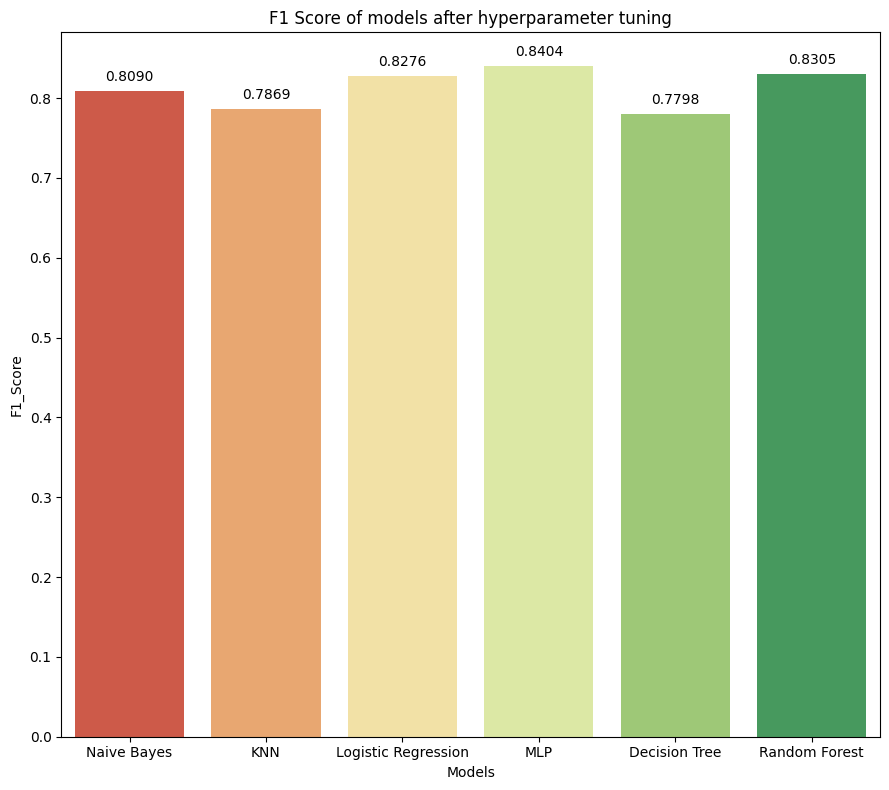

In [93]:
plt.figure(figsize=(9,8))
ay=sns.barplot(x=models_hyp.Model, 
            y=models_hyp.F1_Score, 
            orient='v',
            palette='RdYlGn'
           )
for p in ay.patches:
    ay.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points'
               )
plt.xlabel('Models')
plt.title('F1 Score of models after hyperparameter tuning')
plt.tight_layout();

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

In [94]:
import pandas as pd

In [95]:
train_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,WindDirCombined,WindSpeedMean,AvgHumidity,PressureMean,AvgCloud,TempRange,year,month,day
0,Albury,14.6,30.0,0.0,NaN,NaN,NE,37.0,0,EN,11.5,43.0,1013.75,2.0,10.9,2009,3,22
1,Albury,10.7,21.9,0.0,NaN,NaN,W,63.0,0,NW,28.5,35.5,1009.00,NaN,-1.6,2009,4,15
2,Albury,5.7,21.4,0.0,NaN,NaN,ESE,17.0,0,ENS,6.5,53.5,1023.05,NaN,8.7,2009,4,21
3,Albury,10.6,16.2,0.0,NaN,NaN,WNW,39.0,0,ENS,5.5,80.0,1005.65,8.0,0.2,2009,4,24
4,Albury,3.7,19.1,0.0,NaN,NaN,SSE,19.0,0,ES,5.5,69.0,1021.75,NaN,11.5,2009,5,19


In [96]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         9699 non-null   object 
 1   MinTemp          9664 non-null   float64
 2   MaxTemp          9683 non-null   float64
 3   Rainfall         9699 non-null   float64
 4   Evaporation      5560 non-null   float64
 5   Sunshine         5063 non-null   float64
 6   WindGustDir      9007 non-null   object 
 7   WindGustSpeed    9011 non-null   float64
 8   RainToday        9699 non-null   int64  
 9   WindDirCombined  9699 non-null   object 
 10  WindSpeedMean    9494 non-null   float64
 11  AvgHumidity      9421 non-null   float64
 12  PressureMean     8744 non-null   float64
 13  AvgCloud         5554 non-null   float64
 14  TempRange        9486 non-null   float64
 15  year             9699 non-null   int32  
 16  month            9699 non-null   int32  
 17  day           

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         48423 non-null  int32  
 1   MinTemp          48423 non-null  float64
 2   MaxTemp          48423 non-null  float64
 3   Rainfall         48423 non-null  float64
 4   Evaporation      48423 non-null  float64
 5   Sunshine         48423 non-null  float64
 6   WindGustDir      48423 non-null  int32  
 7   WindGustSpeed    48423 non-null  float64
 8   RainToday        48423 non-null  float64
 9   RainTomorrow     48423 non-null  float64
 10  WindDirCombined  48423 non-null  int32  
 11  WindSpeedMean    48423 non-null  float64
 12  AvgHumidity      48423 non-null  float64
 13  PressureMean     48423 non-null  float64
 14  AvgCloud         48423 non-null  float64
 15  TempRange        48423 non-null  float64
 16  year             48423 non-null  int32  
 17  month       

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2

In [99]:
from sklearn.impute import SimpleImputer
 
missing_values = train_test.isnull().sum()
print(missing_values)


numeric_cols = train_test.select_dtypes(include=['float64']).columns
categorical_cols = train_test.select_dtypes(include=['object']).columns
 
numeric_imputer = SimpleImputer(strategy='mean')
 
categorical_imputer = SimpleImputer(strategy='most_frequent')
 
train_test[numeric_cols] = numeric_imputer.fit_transform(train_test[numeric_cols])
train_test[categorical_cols] = categorical_imputer.fit_transform(train_test[categorical_cols])

missing_values = train_test.isnull().sum()
print(missing_values)


Location              0
MinTemp              35
MaxTemp              16
Rainfall              0
Evaporation        4139
Sunshine           4636
WindGustDir         692
WindGustSpeed       688
RainToday             0
WindDirCombined       0
WindSpeedMean       205
AvgHumidity         278
PressureMean        955
AvgCloud           4145
TempRange           213
year                  0
month                 0
day                   0
dtype: int64
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
RainToday          0
WindDirCombined    0
WindSpeedMean      0
AvgHumidity        0
PressureMean       0
AvgCloud           0
TempRange          0
year               0
month              0
day                0
dtype: int64


In [100]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
for i in train_test:
    if train_test[i].dtype=='object':
        train_test[i] = le.fit_transform(train_test[i])
    else:
        continue

In [101]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         9699 non-null   int32  
 1   MinTemp          9699 non-null   float64
 2   MaxTemp          9699 non-null   float64
 3   Rainfall         9699 non-null   float64
 4   Evaporation      9699 non-null   float64
 5   Sunshine         9699 non-null   float64
 6   WindGustDir      9699 non-null   int32  
 7   WindGustSpeed    9699 non-null   float64
 8   RainToday        9699 non-null   int64  
 9   WindDirCombined  9699 non-null   int32  
 10  WindSpeedMean    9699 non-null   float64
 11  AvgHumidity      9699 non-null   float64
 12  PressureMean     9699 non-null   float64
 13  AvgCloud         9699 non-null   float64
 14  TempRange        9699 non-null   float64
 15  year             9699 non-null   int32  
 16  month            9699 non-null   int32  
 17  day           

In [102]:
my_classifier = classifier_rf # 0.93 gia default
my_classifier_hyper = knn # 0.90 me hyper


In [103]:
predicted_raining = my_classifier.predict(train_test.values)
predicted_raining_hyper = my_classifier_hyper.predict(train_test.values)


In [104]:
print(sum(predicted_raining))
print(sum(predicted_raining_hyper))

1401.0
3.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         48423 non-null  int32  
 1   MinTemp          48423 non-null  float64
 2   MaxTemp          48423 non-null  float64
 3   Rainfall         48423 non-null  float64
 4   Evaporation      48423 non-null  float64
 5   Sunshine         48423 non-null  float64
 6   WindGustDir      48423 non-null  int32  
 7   WindGustSpeed    48423 non-null  float64
 8   RainToday        48423 non-null  float64
 9   RainTomorrow     48423 non-null  float64
 10  WindDirCombined  48423 non-null  int32  
 11  WindSpeedMean    48423 non-null  float64
 12  AvgHumidity      48423 non-null  float64
 13  PressureMean     48423 non-null  float64
 14  AvgCloud         48423 non-null  float64
 15  TempRange        48423 non-null  float64
 16  year             48423 non-null  int32  
 17  month       

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

In [106]:
num = list(range(1, len(predicted_raining)+1))
predicted_raining = [int(x) for x in predicted_raining]

In [107]:
my_submission = pd.DataFrame({'id': num, 'RainTomorrow': predicted_raining})
my_submission.to_csv('submission.csv', index=False)

In [108]:
my_submission

,id,RainTomorrow
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
9694,9695,0
9695,9696,0
9696,9697,0
9697,9698,0


In [109]:
sum(predicted_raining)

1401